Window size 1: MSE = 0.0050
Window size 2: MSE = 0.0034
Window size 3: MSE = 0.0031
Window size 4: MSE = 0.0029
Window size 5: MSE = 0.0028
Window size 6: MSE = 0.0027
Window size 7: MSE = 0.0026
Window size 8: MSE = 0.0026
Window size 9: MSE = 0.0025
Window size 10: MSE = 0.0025
Window size 11: MSE = 0.0025
Window size 12: MSE = 0.0025
Window size 13: MSE = 0.0025
Window size 14: MSE = 0.0024
Window size 15: MSE = 0.0025
Window size 16: MSE = 0.0024
Window size 17: MSE = 0.0024
Window size 18: MSE = 0.0024
Window size 19: MSE = 0.0024
Window size 20: MSE = 0.0024
Window size 21: MSE = 0.0024
Window size 22: MSE = 0.0024
Window size 23: MSE = 0.0024
Window size 24: MSE = 0.0024
Window size 25: MSE = 0.0024
Window size 26: MSE = 0.0024
Window size 27: MSE = 0.0024
Window size 28: MSE = 0.0024
Window size 29: MSE = 0.0024
Window size 30: MSE = 0.0024
Window size 31: MSE = 0.0024
Window size 32: MSE = 0.0024
Window size 33: MSE = 0.0024
Window size 34: MSE = 0.0024
Window size 35: MSE = 0

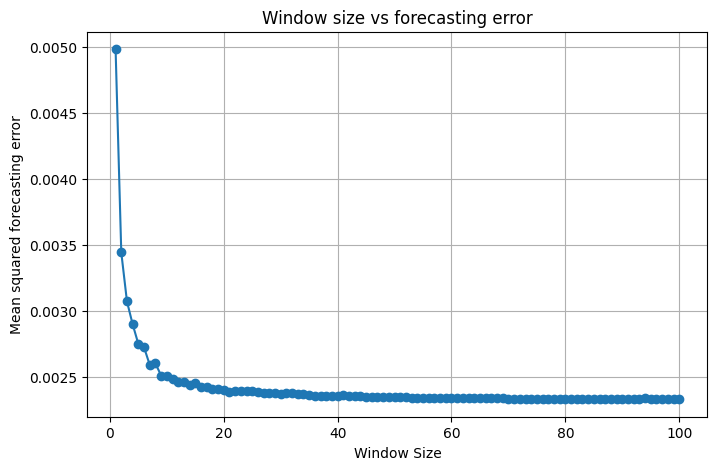

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PyEMD import EMD  # or from emd import sifting
from scipy.signal import hilbert

csv_file = '../../data/datav.csv'
df = pd.read_csv(csv_file)
X = df['returns'].values

# EMD
emd = EMD()
imfs = emd.emd(X)

# Hilbert transform
sampling_interval = 1.0  # delta for the data
all_amplitudes = []
all_frequencies = []

for imf in imfs:
    analytic_signal = hilbert(imf)
    amplitude = np.abs(analytic_signal)
    phase = np.unwrap(np.angle(analytic_signal))
    
    freq = np.diff(phase) / sampling_interval
    
    all_amplitudes.append(amplitude)
    all_frequencies.append(freq)



all_powers = [amp**2 for amp in all_amplitudes]



def modeling_error(X, window_size):
    N = len(X)
    if window_size >= N:
        return np.inf

    errors = []
    for t in range(0, N - window_size):
         window = X[t:t+window_size]
         forecast = np.mean(window) 
         actual = X[t+window_size]
         errors.append((forecast - actual)**2)
    
    mse = np.mean(errors)
    return mse



candidate_windows = range(1, min(101, len(X)//2), 1)
errors = []

for w in candidate_windows:
    err = modeling_error(X, w)
    errors.append(err)
    print(f"Window size {w}: MSE = {err:.4f}")

optimal_window = candidate_windows[np.argmin(errors)]
print("\nOptimal window size (minimizing forecasting error):", optimal_window)

plt.figure(figsize=(8, 5))
plt.plot(candidate_windows, errors, marker='o', linestyle='-')
plt.xlabel("Window Size")
plt.ylabel("Mean squared forecasting error")
plt.title("Window size vs forecasting error")
plt.grid(True)
plt.show()